# Plot the coupling efficiency for different laser diode-waveguide combinations as a function of the separation distance

The calculation of the coupling efficiency shown in this script is based on the information found [here](https://is.gd/XRjN6o). Modifications were made to the geometrical efficiency factor to allow calculations of the coupling efficiency when the laser diode and the waveguide are separated by some distance.

## 1. Import all the necessary packages 

The package "efficiency" containts the definitions of the classes (SquaredWaveguide, LaserDiode and Calculator) that are used in this script. The file "efficiency.py" should be in the same folder as this script in order to run.

In addition, the following python packages should be installed (dependencies):
- numpy
- matplotlib
- seaborn

Once this packages are installed, we import them into our script with the following commands

In [1]:
import efficiency as ef
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Create instances of the squared waveguides

We create an instance of the class SquaredWaveguide. This class allows to have a general definition of a waveguide with a squared cross-section, which depends on some inital parameters, like the indices of refractions of the core and cladding, and to automaticatically derive some values (e.g. the acceptance angle) once the initial parameters are introduced.

The inital parameters/attributes of the waveguide are:

**n_core **: _index of refraction of the waveguide's core._

**n_clad**: _index of refraction of the waveguide's cladding._

**core_thickness**: _thickness of the core layer. Units: um_

**clad_thickness**: _thickness of the cladding layer. Units: um_


We create an instance of a a waveguide with a square cross-section and store it in the variable waveguide1 with

```python
waveguide1 = efficiency.SquaredWaveguide(n_core, n_clad, core_thickness, clad_thickness)
```

In [2]:
# Here: a waveguide with core material AF32 glass (n=1.51) and cladding material SiO2 (n=1.465)
waveguide1 = ef.SquaredWaveguide(1.51, 1.465, 50, 1)
waveguide2 = ef.SquaredWaveguide(1.51, 1.465, 30, 1)
# make a list of the lasers so that we can iterate over them
waveguides = [waveguide1, waveguide2]

## 3. Create instances of the laser diodes

We create an instance of the class LaserDiode. Similarly to the case of the waveguide, this allows to have a general definition of the laser diode and to automatically calculate some properties of the laser once the intial attributes of the laser are defined.

The inital parameters/attributes of the laser diode are:

**lda**: _wavelength_.

**fwhm_slow**: _Full width at half maximum on the slow axis. Units: deg_

**fwhm_fast**: _Full width at half maximum on the fast axis. Units: deg_


We create an instance of a laser diode which is stored in the variable laser1 with

```python
laser1 = efficiency.LaserDiode(lda, fwhm_slow, fwhm_fast)
```

In [3]:
# Here: GNx blue laser diode
# laser1 = ef.LaserDiode(405,9,26,2,0.4)
laser1 = ef.LaserDiode(405, 9, 26)
# CHIP-980-P50 infrared
laser2 = ef.LaserDiode(980, 13, 30)
# 650nm Red Laser Diode Chips for DVD
laser3 = ef.LaserDiode(655, 8, 28)
# communications laser 1550nm wavelength
laser4 = ef.LaserDiode(1550, 9, 28)

# make a list of the lasers so that we can iterate over them
lasers = [laser1, laser2, laser3, laser4]

## 4. Plot the coupling efficiency curves

The coupling efficiency curves are calculated for each laser diode-waveguide combination as a function of the separation distance between them.

Therefore, the first thing we have to do is to select the range where the separation distance is going to evaluated and the step/precision of the points selected in that range.

In [4]:
# generate a vector/array containing the separating distances between the LD and the WG to be evaluated
x = np.arange(1, 200.5, 0.5)  # we will evaluate separation distances from 1 to 200 um, in intervals of 0.5 um.
n = len(x)

Activate seaborn plotting for nicer plots

In [5]:
sns.set()
sns.set_style("whitegrid")

Plot a coupling efficiency curve for every posible combination of laser diode and waveguide

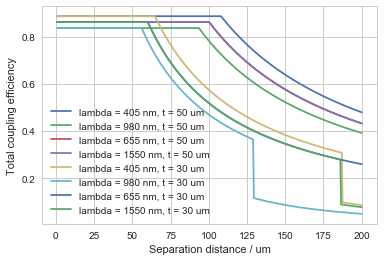

In [6]:
# create an empty list to store the legend labels of the plots for each laser-waveguide combination
labels = []

# calculate the efficiency for each laser-waveguide combination
for waveguide in waveguides:
    for laser in lasers:
        # make an instance of the efficiency calculator for each laser-waveguide combination. 
        # That is, we bring together the information of the laser diode and the waveguide, 
        # so that the program can calculate the coupling efficiency.
        calc = ef.Calculator(waveguide, laser)
        # preallocate vectors for each efficiency
        n_geom = np.zeros(n)
        n_fresnel = calc.fresnel_losses()
        n_angular = calc.angular_losses()
        n_total = np.zeros(n)
        # calculate the efficiency for every distance
        for i in range(n):
            wo_s, wo_f = laser1.calculate_beam_width(x[i])

            n_geom[i] = calc.geometrical_losses(x[i])
            n_total[i] = calc.total_efficiency(x[i])

        # plot the total efficiency as a function of the separation distance
        plt.plot(x, n_total)
        labels.append(f'lambda = {laser.lda} nm, t = {waveguide.core_thickness} um')

# set axis labels and legend
plt.xlabel('Separation distance / um')
plt.ylabel('Total coupling efficiency')
plt.legend(labels, loc='best')

plt.show()